In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
scale=MinMaxScaler()
data['Age']=scale.fit_transform(data[['Age']])
scale.fit(data[['Income($)']])
data['Income($)']=scale.transform(data[['Income($)']])
data.head(10)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [7]:
kms=KMeans(n_clusters=3)
pred=kms.fit_predict(data[['Age','Income($)']])
data['clusters']=pred
data.head(10)


c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
centroids=kms.cluster_centers_


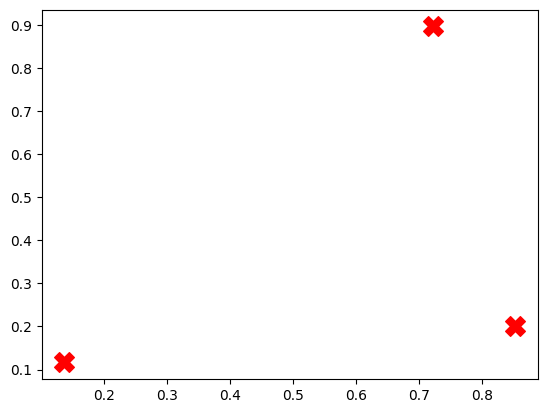

In [11]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

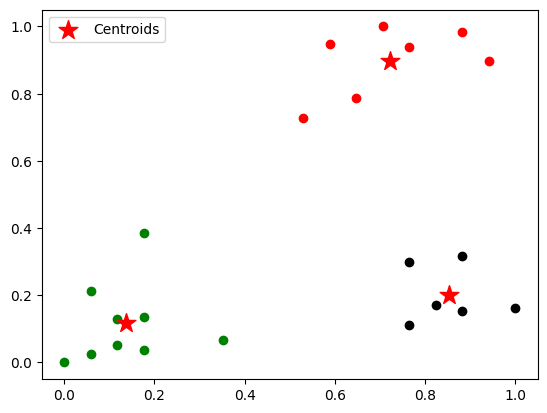

In [13]:
data1 = data[data.clusters==0]
data2 = data[data.clusters==1]
data3 = data[data.clusters==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
# plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [23]:
ssm=[]
for i in range(1,10):
    kms=KMeans(n_clusters=i)
    kms.fit(data[['Age','Income($)']])
    ssm.append(kms.inertia_)
ssm
    

c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.2187801089333045,
 0.1685851223602976,
 0.13265419827245162,
 0.11181345102100439]

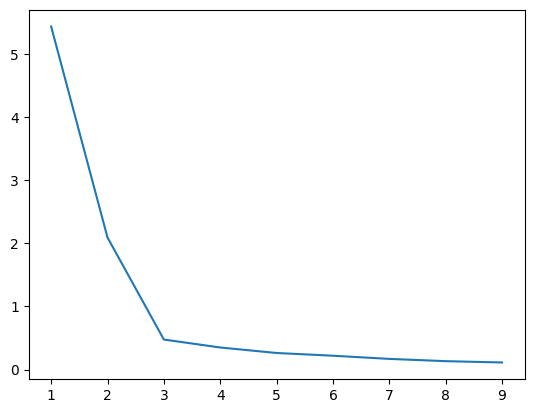

In [24]:
plt.plot(range(1,10),ssm)